In [1]:
from tensorflow import keras
from tensorflow.keras import layers,optimizers

In [2]:
import pathlib

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
data_dir="/content/drive/MyDrive/ProjectDatasets/MaskDetect"
data_dir=pathlib.Path(data_dir)
len(list(data_dir.glob("without_mask/*.jpg")))

674

In [5]:
image_dict={
    "with_mask":list(data_dir.glob("with_mask/*.jpg")),
    "without_mask":list(data_dir.glob("without_mask/*.jpg"))
}

In [6]:
labels={
    "with_mask":0,
    "without_mask":1
}

In [7]:
classes=["with_mask","without_mask"]

In [8]:
image_dict[classes[1]][0:10]

[PosixPath('/content/drive/MyDrive/ProjectDatasets/MaskDetect/without_mask/without_mask_111.jpg'),
 PosixPath('/content/drive/MyDrive/ProjectDatasets/MaskDetect/without_mask/without_mask_107.jpg'),
 PosixPath('/content/drive/MyDrive/ProjectDatasets/MaskDetect/without_mask/without_mask_119.jpg'),
 PosixPath('/content/drive/MyDrive/ProjectDatasets/MaskDetect/without_mask/without_mask_120.jpg'),
 PosixPath('/content/drive/MyDrive/ProjectDatasets/MaskDetect/without_mask/without_mask_112.jpg'),
 PosixPath('/content/drive/MyDrive/ProjectDatasets/MaskDetect/without_mask/without_mask_101.jpg'),
 PosixPath('/content/drive/MyDrive/ProjectDatasets/MaskDetect/without_mask/without_mask_116.jpg'),
 PosixPath('/content/drive/MyDrive/ProjectDatasets/MaskDetect/without_mask/without_mask_11.jpg'),
 PosixPath('/content/drive/MyDrive/ProjectDatasets/MaskDetect/without_mask/without_mask_106.jpg'),
 PosixPath('/content/drive/MyDrive/ProjectDatasets/MaskDetect/without_mask/without_mask_104.jpg')]

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

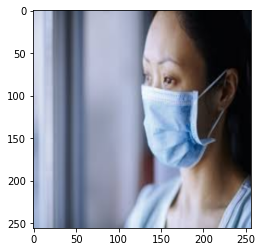

In [10]:
img=cv2.imread(str(image_dict['with_mask'][67]))
img=cv2.resize(img,(256,256))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [14]:
X ,Y= [],[]
for label,path in image_dict.items():
  for i in path:
    img=cv2.imread(str(i))
    img=cv2.resize(img,(224,224))
    X.append(img)
    Y.append(labels[label]) #labels["with_mask"]->0

In [17]:
len(Y)

1389

In [18]:
X=np.array(X)
Y=np.array(Y)

In [19]:
X=X/255

In [20]:
X[0]

array([[[0.1372549 , 0.24705882, 0.22352941],
        [0.10980392, 0.21568627, 0.18039216],
        [0.1254902 , 0.21568627, 0.17647059],
        ...,
        [0.09019608, 0.15294118, 0.1372549 ],
        [0.03921569, 0.14117647, 0.11764706],
        [0.06666667, 0.14901961, 0.1254902 ]],

       [[0.12156863, 0.22745098, 0.20392157],
        [0.11372549, 0.20784314, 0.17647059],
        [0.12941176, 0.21960784, 0.18039216],
        ...,
        [0.18039216, 0.23529412, 0.21960784],
        [0.02745098, 0.1254902 , 0.09411765],
        [0.08627451, 0.16078431, 0.13333333]],

       [[0.10980392, 0.20784314, 0.18823529],
        [0.12156863, 0.21176471, 0.18039216],
        [0.14117647, 0.22745098, 0.19215686],
        ...,
        [0.16470588, 0.21176471, 0.19215686],
        [0.04313725, 0.12156863, 0.08627451],
        [0.11764706, 0.18431373, 0.14509804]],

       ...,

       [[0.12941176, 0.28235294, 0.22745098],
        [0.14117647, 0.28235294, 0.23137255],
        [0.14901961, 0

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [25]:
x_train.shape,y_train.shape

((1111, 224, 224, 3), (1111,))

In [23]:
from keras.applications.vgg16 import VGG16
vgg=VGG16()
vgg.summary()

553467096/553467096 [==============================] - 24s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [26]:
from keras import Sequential
model=Sequential()

In [27]:
for layers in vgg.layers[:-1]: #Ignore output layer
  model.add(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [29]:
for layer in model.layers:
  layer.trainable=False

In [31]:
from tensorflow.keras.layers import Dense

In [34]:
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [36]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [38]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
35/35 [==============================] - 7s 211ms/step - loss: 0.1252 - accuracy: 0.9604 - val_loss: 0.1212 - val_accuracy: 0.9496
Epoch 2/5
35/35 [==============================] - 7s 199ms/step - loss: 0.1158 - accuracy: 0.9667 - val_loss: 0.1128 - val_accuracy: 0.9604
Epoch 3/5
35/35 [==============================] - 7s 202ms/step - loss: 0.1194 - accuracy: 0.9649 - val_loss: 0.1247 - val_accuracy: 0.9784
Epoch 4/5
35/35 [==============================] - 7s 207ms/step - loss: 0.1134 - accuracy: 0.9640 - val_loss: 0.0987 - val_accuracy: 0.9784
Epoch 5/5
35/35 [==============================] - 7s 207ms/step - loss: 0.1045 - accuracy: 0.9730 - val_loss: 0.0956 - val_accuracy: 0.9820


In [39]:
model.save("/content/drive/MyDrive/ProjectDatasets/MaskDetect/vgg.h5")